# Foundation Data Sciences
## Week 08: Principal Component Analysis

**Learning outcomes:** 
In this lab you will implement PCA from scratch and compare your outcomes to the standard scikit-learn PCA. By the end of the lab you should be able to:
- explain the difference between standardization, normalization, and scaling,
- explain why it is important to standardize data prior to PCA,
- implement PCA from scratch,
- use the sklearn library to get the principal components from a data set.

In this lab we will first try to use PCA on a breast cancer patients data set in order to help predict whether a cancer is benign or malignant. As with the diabetes data set, this week, we will take only the first two steps (plotting our initial data and preparing our data). However, we will learn a new preprocessing step, which can be extremely beneficial to inspect our data and apply further steps more efficiently. In the next lab, we will run actual algorithms to predict the diagnosis of patients from their symptoms. 
In the last part of this lab, we will go back to the diabetes data set from week 05, in order to get one step closer to predicting whether patients have diabetes or not.

**Data set information:** The new data set is from [UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). It contains patients information taken from patients with benign and malignant breast cancer.

In [96]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importing sklearn functions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Discussion:** Try to remember with your lab partner what PCA is useful for.

Your answer:

We start as usual by loading data, inspecting data, and cleaning data.

**Exercise 01:**
- Load the `breast_cancer.csv` file from `datasets`, and store it as `breast_cancer`.
- Print out the first few lines of the data set.
- We have a few problems in the data set:
    - we don't need the patients' ids, and for privacy issues we want to remove them,
    - the diagnosis column has as values 'M' and 'B', which is in a format which makes it hard to apply mathematical operations to, and
    - the last column 'Unnamed: 32' seems completely useless.
- Fix the problems as follows:
     - Remove the `id` column, and the `Unnamed: 32` column.
     - Replace the 'M's and 'B's values with 1 and 0. (Hint: look up the documentation for `replace` in the pandas documentation).
     - Remove all rows that have NaN values.
- Plot the data set in a pair plot, where malignant and benign cancers are colored differently. (Hint: For speed up, and readability use only 8 columns of your choice.)
- Save the diagnosis column in a separate pandas series, called `diagnosis` and remove it from the `breast_cancer` dataframe.
-  Finally, print out the first few entries to make sure that all changes you made to the data set are as expected.

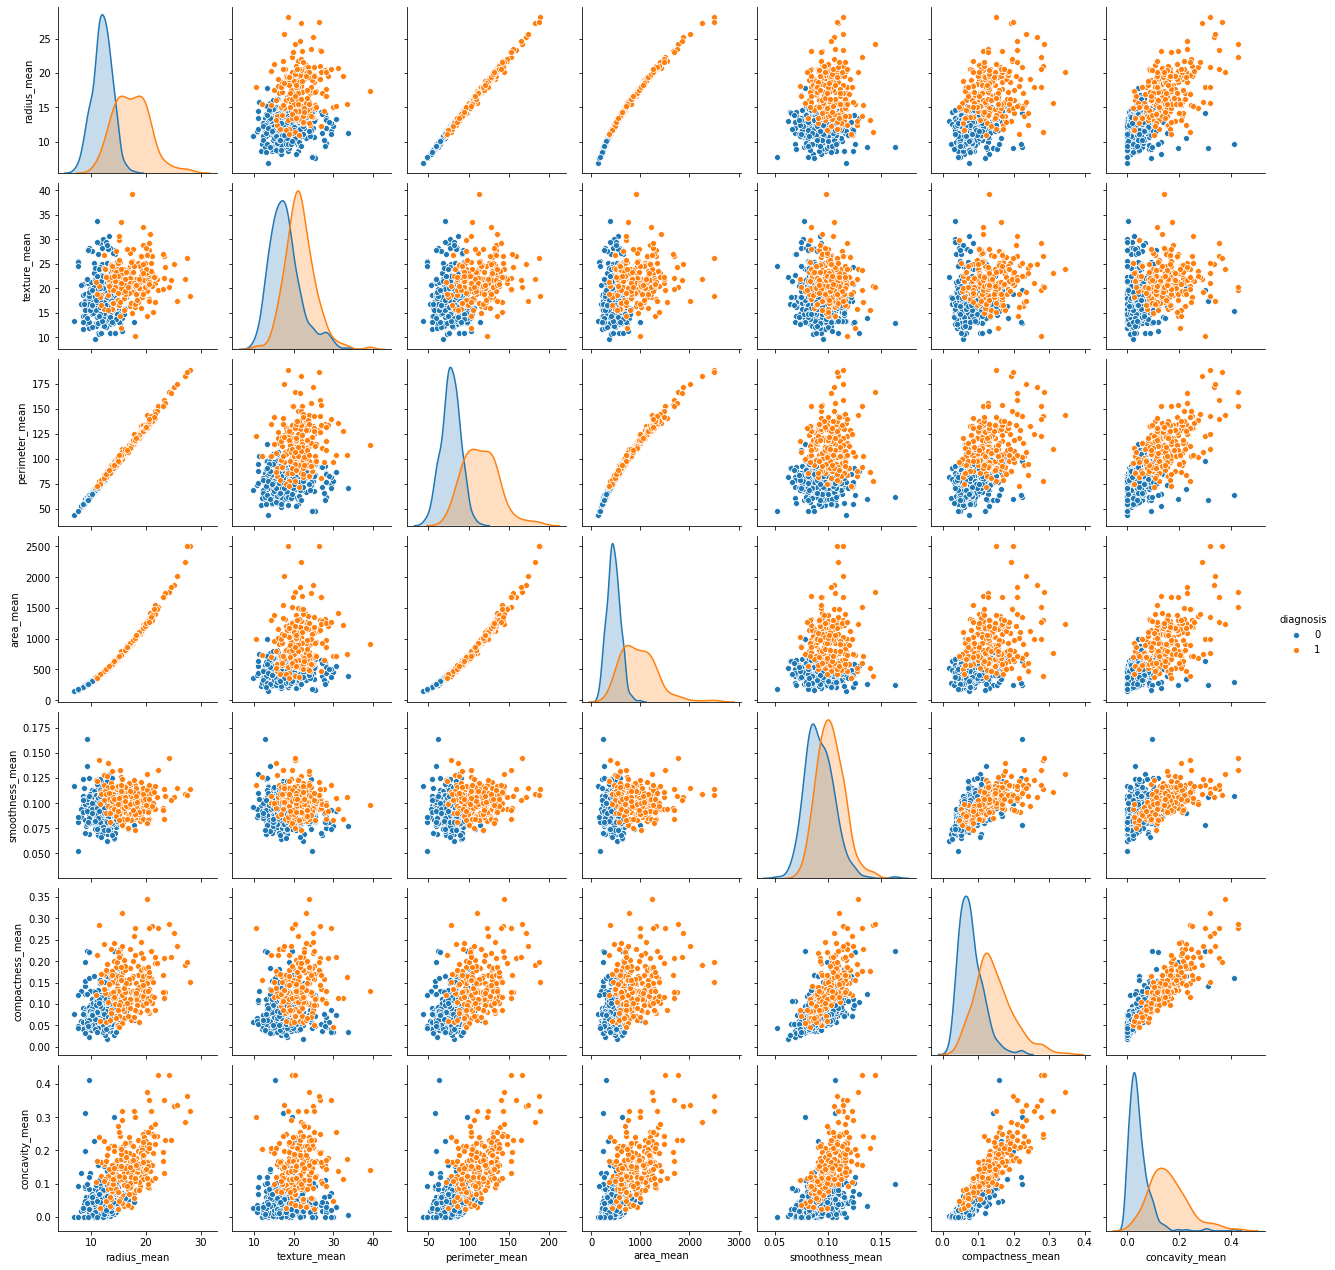

In [97]:
# Your code
# Clean up
breast_cancer = pd.read_csv('datasets/breast_cancer.csv')
breast_cancer = breast_cancer.drop(['id', 'Unnamed: 32'], axis=1)
breast_cancer = breast_cancer.replace(['M', 'B'], [1, 0])
breast_cancer = breast_cancer.dropna(axis=0, how='any')
# diagnosis in separate
diagnosis = breast_cancer['diagnosis']
# plot
bc_choosing = breast_cancer[["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean"]]
sns.pairplot(bc_choosing, hue='diagnosis')

At first glance, it already looks like there are some dimensions with a clear boundary between the two patient groups. Our goal will be to use PCA to make this distinction even clearer.

**Remark:** PCA can be especially helpful for data sets where the separation of classes is not that clear. But even in the case above, we might want to take several dimensions into consideration. Furthermore, visualising many more than the 8 variables above is challenging. PCA can help us with both problems.

The first step is to standardize the data, as described in the lecture notes. You may read about the similar operations of normalization or scaling when searching online - see this [short article](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02) (7 minutes) for descriptions of the terms.

**Discussion:** Discuss with your lab partner why standardization is important before applying PCA to a data set.

Your answer:  
The values are not focused. We have ones that have values around 2000 and ones below 1.

**Exercise 02:** 

Write a function `def standardize()` that takes as input a data set `df`, and returns a standardized data set. Try not to copy+paste code from the internet, but rather try to think of the math that needs to be applied to the data set. If you are stuck, look up the Week 5 lecture notes (Statistical Preliminaries topic).

Call the function on the data set and print it to the screen.

In [107]:
def standardize_value(std, mean):
    def func(val):
        return (val - mean) / std
    return func

def standardize(df):
    standardize_dict = {}
    for c in df.columns:
        column = df[c]
        c_std = np.std(column)
        c_mean = np.mean(column)
        func = standardize_value(c_std, c_mean)
        standardize_dict[c] = column.map(func)
    return pd.DataFrame.from_dict(standardize_dict)

Now, we write the PCA function.

**Exercise 03:**

Write a function `def principal_component_analysis()` that takes as input a data set `df`. The function should first standardize the data with your `standardize()` function, then compute the covariance matrix of the standardized data set, and finally compute and return the eigenvalues and eigenvectors of the covariance matrix. 

You may use `np.cov()` and `np.linalg.eig()` to compute the covariance matrix and the eigenvalues and eigenvectors. However, be careful about the shapes of your matrices and vectors. 

Call the function on the dataset, with the `breast_cancer` dataset and print it to the screen.

In [99]:
# Your code
def sort_eigenvalues(eigenvalues, eigenvectors):
    ind = np.argsort(-eigenvalues)
    return ind



**Exercise 04:** 

If you have read the documentation of `np.linalg.eig()` carefully, you should have read that the eigenvalues are not sorted in any way. However, for PCA, we are interested in a descending order of the eigenvalues (and according eigenvectors).

- Write a function `def sort_eigenvalues()`, which takes as first input `eigenvalues`, an array with eigenvalues, and as second input `eigenvectors`, a 2-D array with the associated eigenvectors. The function should sort the eigenvalues and eigenvectors such that the first eigenvalue is the biggest. 

Careful, look up the documentation of `np.linalg.eig()` again, to be sure how the eigenvalues are connected to the eigenvectors! Hint: `argsort()` from the numpy library might be helpful.

In [100]:
# Your code

**Exercise 05:** 
- Rewrite your PCA function, such that it returns the eigenvalues and eigenvectors sorted largest to smallest.
- The function should also print out the percentage of the variance explained by each principal component, before returning the eigenvalues and eigenvectors.

In [101]:
# Your code
def principal_component_analysis(df):
    df = standardize(df)
    df_cov = np.cov(df.T)
    eigenvalues,eigenvectors = np.linalg.eig(df_cov)
    ind = sort_eigenvalues(eigenvalues, eigenvectors)
    eigenvalues = np.take_along_axis(eigenvalues, ind, axis=0)
    eigenvectors = np.take_along_axis(eigenvectors, np.array([ind for i in range(len(eigenvectors))]), axis=1)
    return eigenvalues, eigenvectors
    
pca_result = principal_component_analysis(breast_cancer)
pca_result


(array([1.39422741e+01, 5.73643378e+00, 2.85186154e+00, 2.00188139e+00,
        1.66199949e+00, 1.20963379e+00, 6.85924646e-01, 4.85709057e-01,
        4.17628800e-01, 3.51511408e-01, 3.05392113e-01, 2.91498144e-01,
        2.61469947e-01, 2.12649275e-01, 1.48837762e-01, 8.83177777e-02,
        8.00007715e-02, 5.91392660e-02, 5.15525101e-02, 4.83008359e-02,
        3.07603392e-02, 2.95786345e-02, 2.73928094e-02, 2.43263453e-02,
        1.75831161e-02, 1.55005796e-02, 8.07032705e-03, 6.88182652e-03,
        1.59126388e-03, 7.42984526e-04, 1.32868212e-04]),
 array([[ 2.16916950e-01, -7.76099428e-02,  1.03825983e-01,
          9.80829303e-02,  8.07832685e-02, -1.20502582e-02,
         -1.46156747e-01,  1.82757245e-01,  3.12727329e-04,
          5.02139227e-02, -6.44348300e-01,  3.19011095e-01,
          3.39503703e-02, -4.79306091e-01, -2.47454171e-01,
          1.77559197e-01,  4.66616890e-03,  3.86104471e-02,
         -6.07206769e-02, -9.19338179e-02,  3.66629983e-02,
         -5.327980

Let us compare our largest two eigenvalues and eigenvectors to the output of the PCA model from the sklearn library. The sklearn PCA does not standardize the data automatically, it only centers the data around 0. To get the same results as our implementation, we need to preprocess the data first.

In [102]:
standardized = standardize(breast_cancer)
pca = PCA(n_components=2).fit(standardized.values) # number of principil components that we are interested in
print(pca.explained_variance_) # Eigenvalues
print(pca.components_) # Eigenvector (Careful: sklearn returns the eigenvectors in columns in contrast to numpy)

[13.94227406  5.73643378]
[[ 0.21691695  0.21639914  0.10359936  0.2245478   0.21796464  0.13764549
   0.23150388  0.25122179  0.2552664   0.1330126   0.05797189  0.20090409
   0.01547414  0.20563036  0.19798194  0.01123624  0.1619218   0.14578435
   0.1762679   0.03832541  0.09508414  0.22558983  0.10501867  0.23364163
   0.22196962  0.12530106  0.20447639  0.22307483  0.24628844  0.12066328
   0.12672101]
 [-0.07760994 -0.22654473 -0.05826196 -0.20762951 -0.22322434  0.18876038
   0.15847307  0.06786768 -0.02722028  0.19321967  0.36761956 -0.09715581
   0.09118826 -0.08069084 -0.14355563  0.20531469  0.23886735  0.203226
   0.13704859  0.1860032   0.28433173 -0.21289639 -0.04513536 -0.19259202
  -0.21188718  0.17247591  0.14766283  0.10308807 -0.00243309  0.14206245
   0.27644912]]


Finally, we want to visualize our PCA results.

**Exercise 06:**
- Call your `principal_component_analysis()` function on the data set and store the return values.
- Apply the first two PC vectors to the standardized(!) data set and store it in a new variable `result`. (Careful about the orientation of your arrays.)
- Plot a scatterplot from the data in `result`, where you use `hue = diagnosis` to color the different data points according to the type of cancer they represent.
- Can you spot a clear separation between benign and malignant cancer?

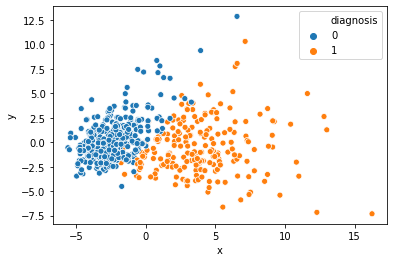

In [113]:
# Your code
eig_val, eig_vec = principal_component_analysis(breast_cancer)
result = standardize(breast_cancer).dot(eig_vec[:, 0:2])
result.columns = ['x', 'y']
result['diagnosis'] = breast_cancer['diagnosis']
sns.scatterplot(data=result, x='x', y='y', hue='diagnosis')

Finally, let us apply the sklearn model we fitted above to the data. Again, we need to apply it to the standardized data. Because multiplying the data with the principal component vectors transforms the data, the method we need to call is `model.transform()`.

Text(0, 0.5, 'PC2')

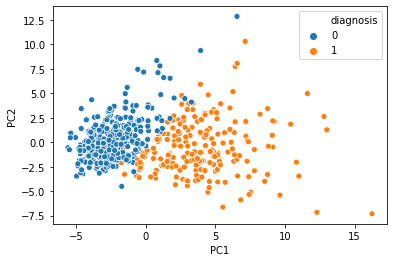

In [114]:
standardized = standardize(breast_cancer)
pca = PCA(n_components=30).fit(standardized.values)
pca_result = pca.transform(standardized.values)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=diagnosis)
plt.xlabel('PC1')
plt.ylabel('PC2')

**Exercise 07:**

In the week 05 lab, we started to look at a diabetes data set. The last activity in this lab is to see if PCA will also help us to visualize that data set.

a)

- Load the diabetes data set.
- Plot the pair plot of that lab, with `hue='Outcome'`.
- Do you think that PCA will give a clear cut distinction that is as good as for the breast cancer data set? Hint: Compare the pair plot of the diabetes data set and the breast cancer data set.
- See if you can remember how the data should be cleaned to remove data points that seem erroneous.

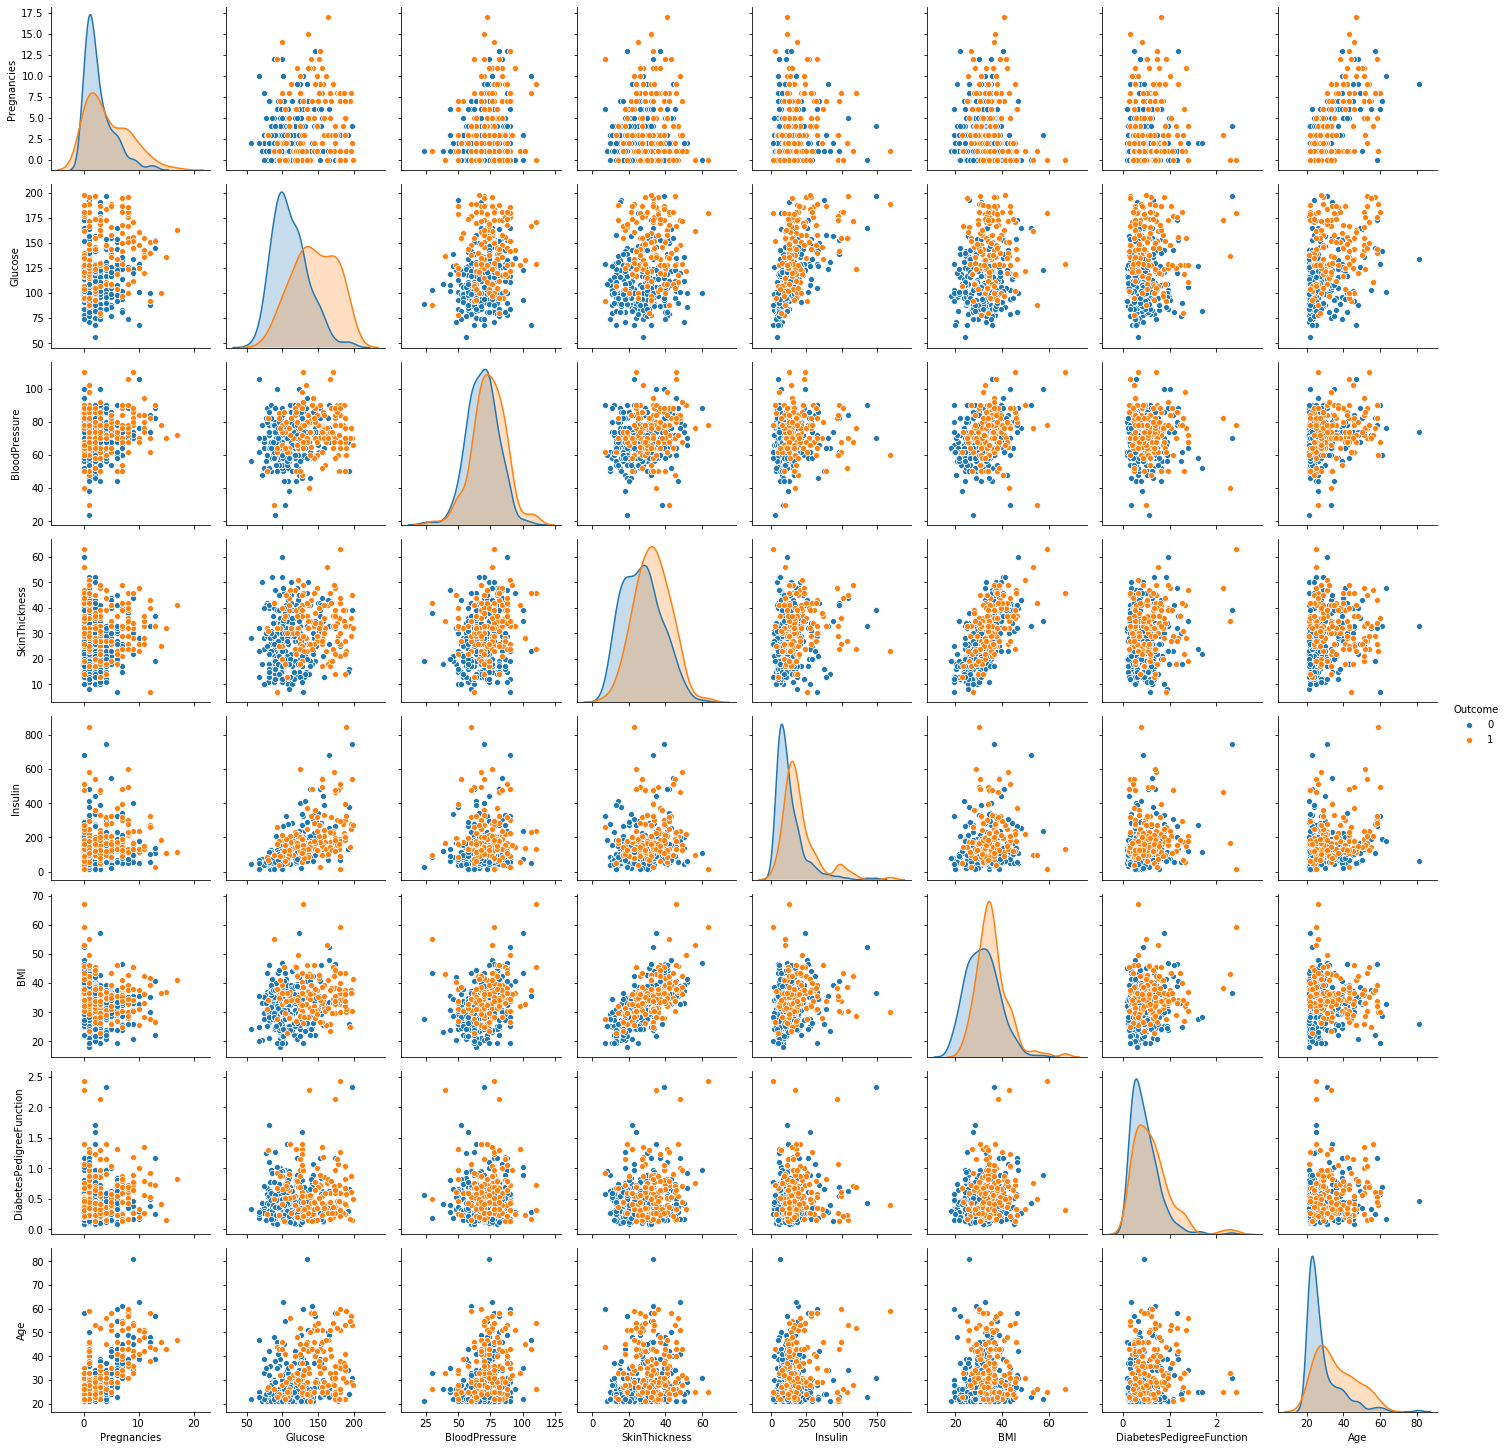

In [117]:
# Your code
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes = diabetes[(diabetes.Glucose != 0) & (diabetes.SkinThickness != 0) & (diabetes.BMI != 0) & (diabetes.Insulin != 0)]
sns.pairplot(diabetes, hue='Outcome')

b) 
- Create a new Pandas Series from the `Outcome` column, store it in `diagnosis_diabetes`, and drop the column from your data set.
- Apply your PCA model, and plot the scatter plot of the first two principal components.

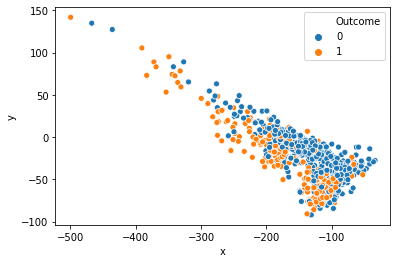

In [127]:
# Your code
diabetes = pd.read_csv('datasets/diabetes.csv')
diagnosis_diabetes = diabetes['Outcome']
diabetes = diabetes.drop(['Outcome'], axis=1)
eig_val, eig_vec = principal_component_analysis(diabetes)
result = diabetes.dot(eig_vec[:, 0:2])
result.columns = ['x', 'y']
result['Outcome'] = diagnosis_diabetes
sns.scatterplot(data=result, x='x', y='y', hue='Outcome')

**Discussion:**

Discuss with your lab partner whether you can already make out two distinct clusters.
Look at the output of your PCA algorithm, and see how many PCs you would need to take into account to get as much explanation as with the first two components of the breast cancer example.

We cannot plot scatter plots with more than three dimensions, however, we can at least plot three dimensions. Run the following script, and discuss whether it looks like we can distinguish diabetes from non-diabetes patients. Hint: Remember that you can set the range of variables with `ax.set_xlim([xmin,xmax])`, in order to look at a range of interest closer.

In [128]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_diabetes[0], result_diabetes[1], result_diabetes[2], c=diagnosis_diabetes)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

ValueError: Unknown projection '3d'

<Figure size 1080x1080 with 0 Axes>

In the next lab, we will use K-Means to try to cluster the patients with and without diabetes into two different groups, and then we will try to predict whether new patients have diabetes.

**We need your help:** This is a new course. In order for us to improve the labs for the next iteration, we need your feedback. Please fill out the following [form](https://forms.office.com/Pages/ResponsePage.aspx?id=sAafLmkWiUWHiRCgaTTcYZmGMCx4KxlMjSTITqjdcXpUNFlYTk1LNDBYODRKV0o5TlhCWVc4U0tLOC4u).

**Optional Exercise:**

Compare the output of your PCA algorithm to a PCA applied to the data set without having cleaning it before. Hint: You might have to reload the data set, if you haven't stored the cleaned data set in a separate variable.

In [ ]:
# Your code
